In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('/creditcard.csv')

# Data Exploration

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
len(df)

284807

In [6]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
pd.set_option('display.max_columns', 500)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Visualization

Text(0.5, 1.0, 'df')

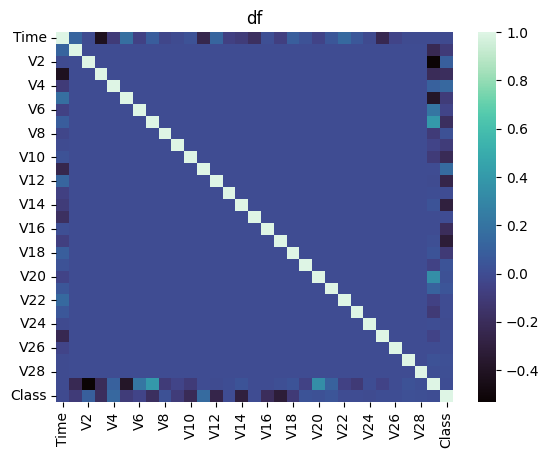

In [10]:
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(df.corr(), cmap = cmap)
plt.title("df")

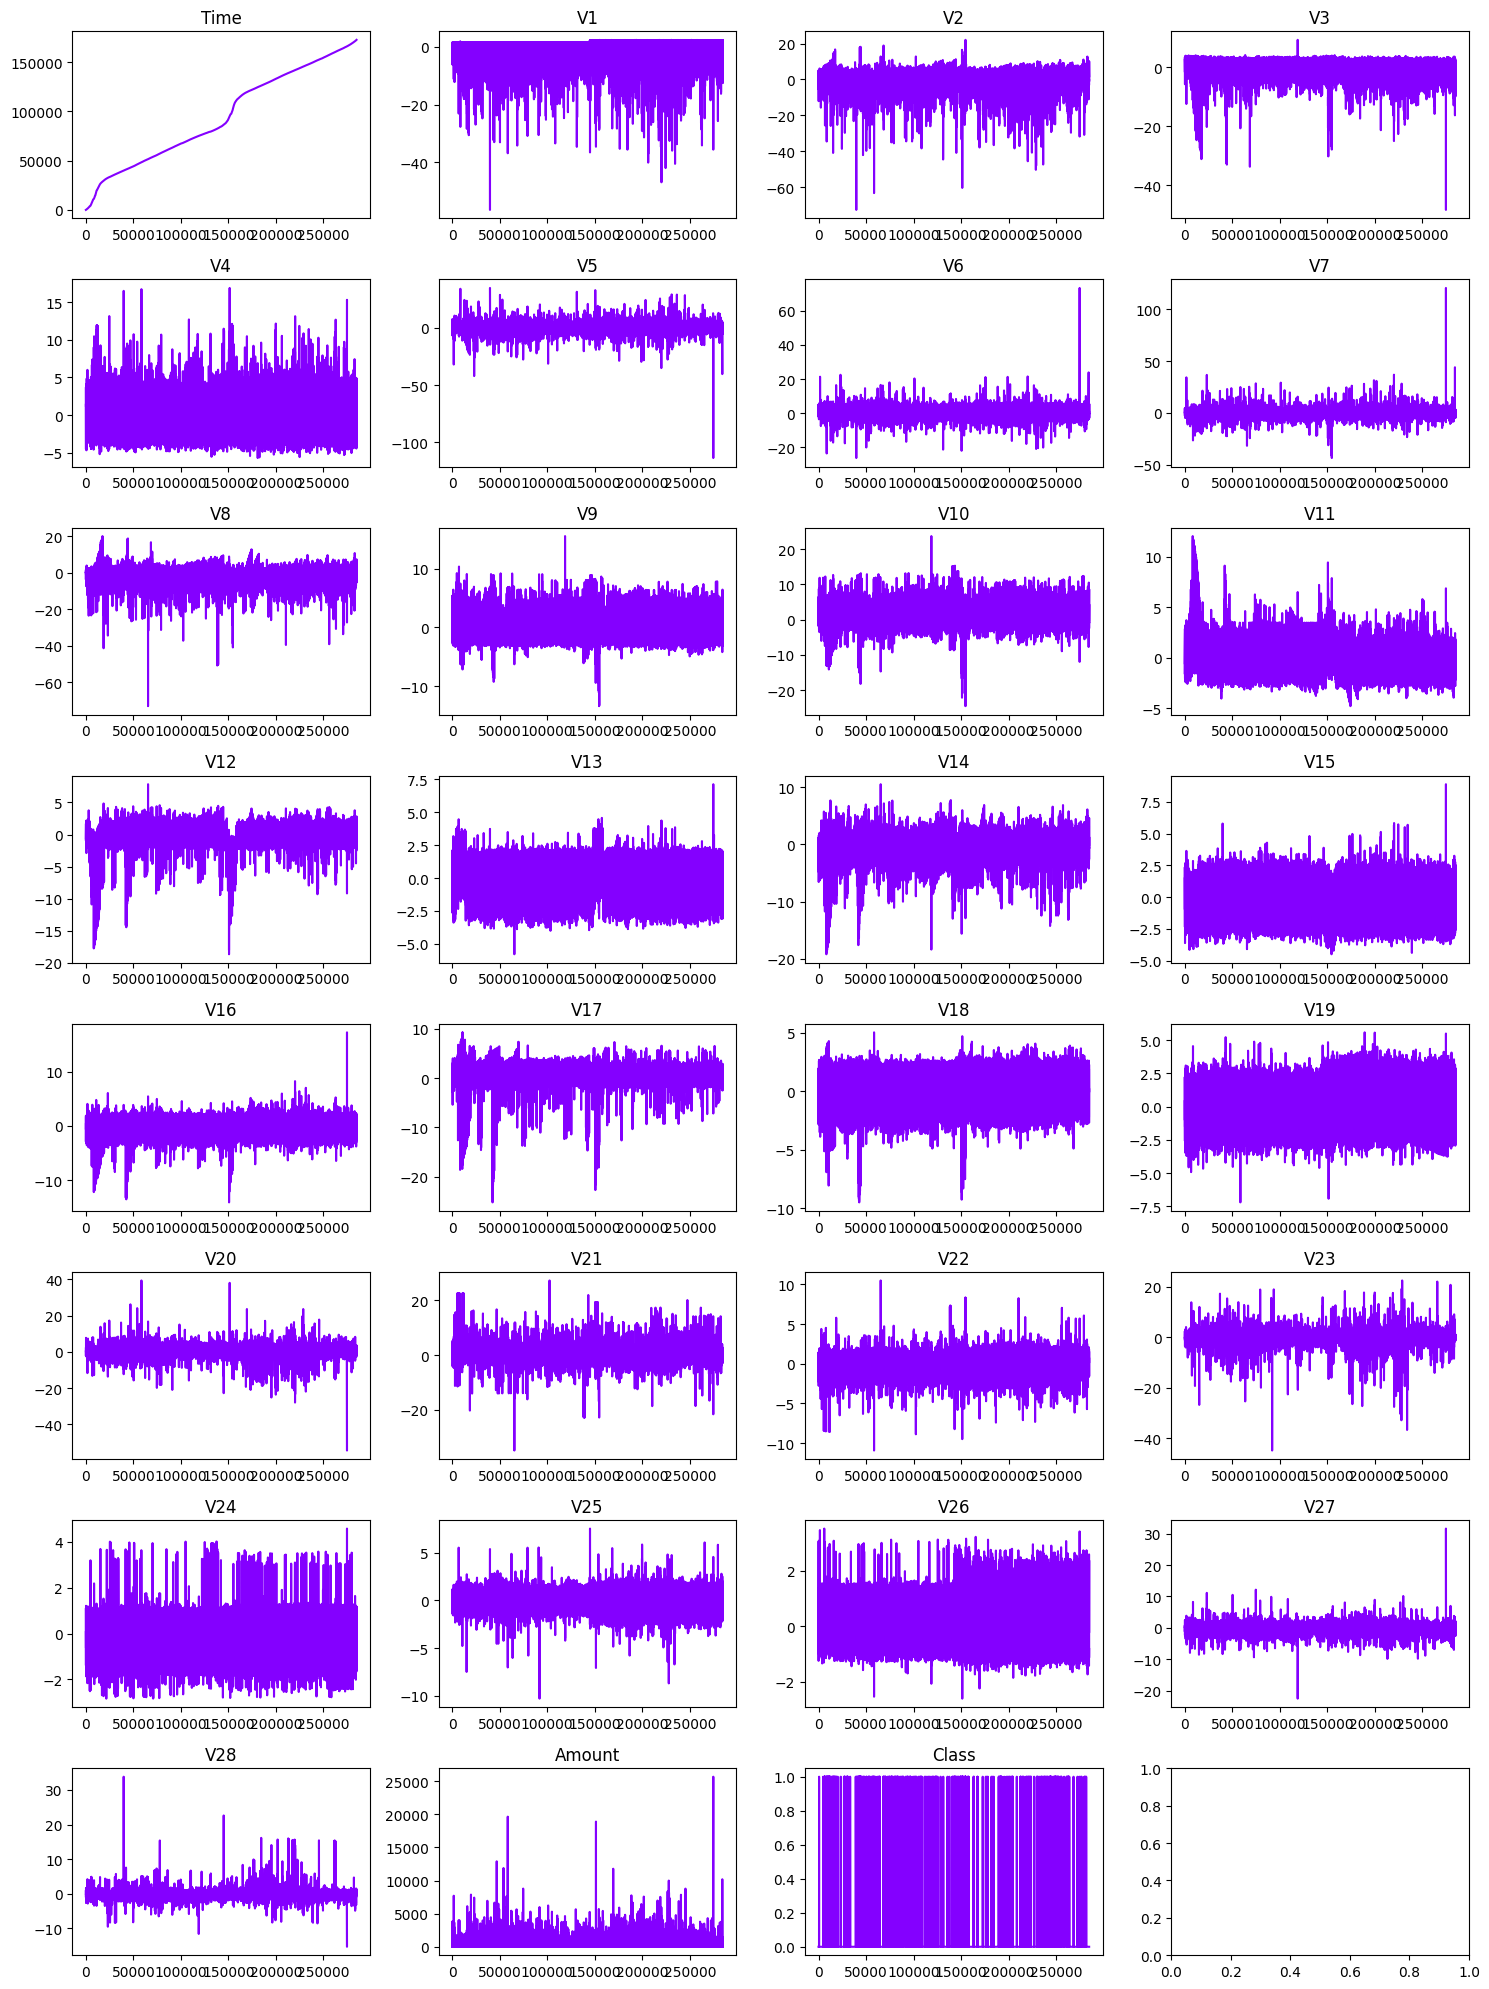

In [11]:
fig, axs = plt.subplots(ncols=4, nrows=8, figsize=(15, 20))

for i, col in enumerate(df.columns):
    row_idx = i // 4
    col_idx = i % 4
    axs[row_idx, col_idx].plot(df[col], color = "#8400FF")
    axs[row_idx, col_idx].set_title(col)

fig.tight_layout()
plt.show()

(0.0, 172792.0)

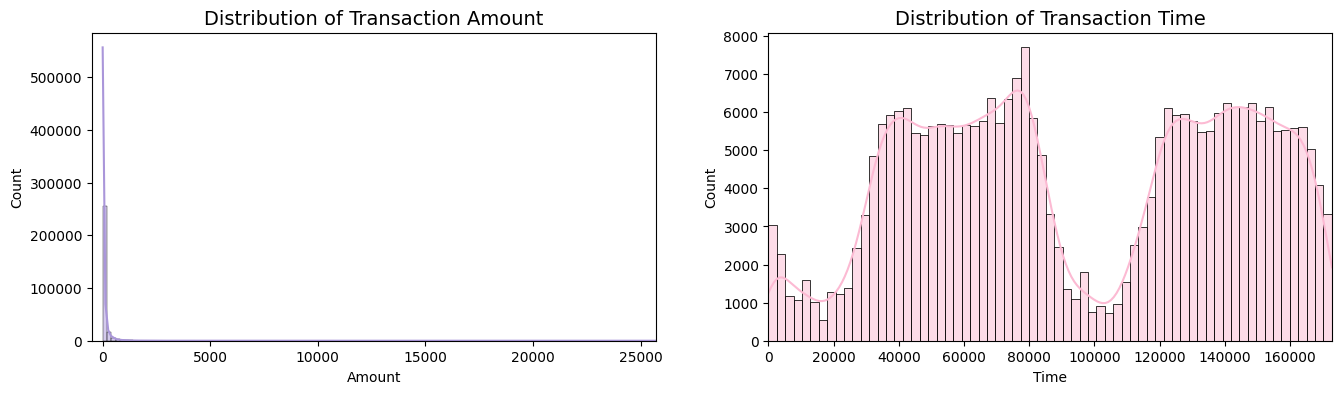

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

amount_val = df.Amount
time_val = df.Time

sns.histplot(df.Amount, ax=ax[0], color='#AA96DA', kde=True, binwidth = 200)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(df.Amount)-500, max(df.Amount)])

sns.histplot(df.Time, ax=ax[1], color='#FCBAD3', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(df.Time), max(df.Time)])

# 3) Data Preprocessing for Model

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df.Amount.values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df.Time.values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [15]:
print('The percentage of no frauds : ', round(df.Class.value_counts()[0]/len(df) * 100, 2), "%")
print('The percentage of frauds : ', round(df.Class.value_counts()[1]/len(df) * 100, 2), "%")

The percentage of no frauds :  99.83 %
The percentage of frauds :  0.17 %


In [16]:
X = df.drop('Class', axis=1)
y = df['Class']

In [17]:
df = df.dropna()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2, sampling_strategy = 0.5)
X_over, y_over = sm.fit_resample(X_train, y_train)

In [20]:
y_over.shape

(319854,)

# 4) Basic Model Building
1)Logistic Regression
2)Random Forest
3)KNeighborsClassifier
4)XGBoost

In [21]:
#4.1)Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg = LogisticRegression()

In [24]:
#Train the model
lg.fit(X_over,y_over)

#Prediction
y_pred = lg.predict(X_test)

In [25]:
len(X_test)

71202

In [26]:
len(y_pred)

71202

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.12      0.87      0.21       123

    accuracy                           0.99     71202
   macro avg       0.56      0.93      0.60     71202
weighted avg       1.00      0.99      0.99     71202



In [29]:
proba = lg.predict_proba(X_test)[:,1]

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,precision_recall_curve

Text(0.5, 1.0, 'Precision Recall Curve')

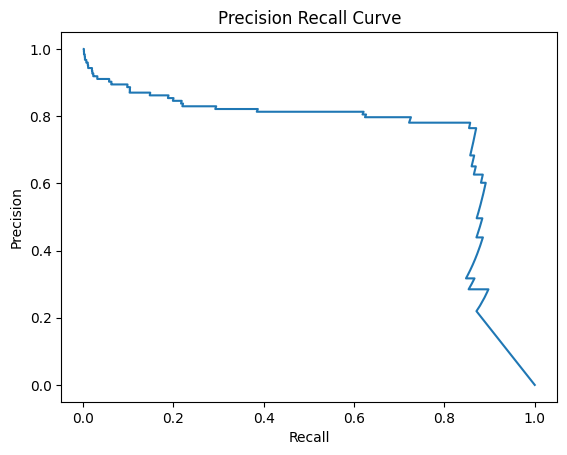

In [31]:
y_pred_prob = lg.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [32]:
#4.2)Random Forrest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier 

In [34]:
from sklearn import metrics
rf_clf = RandomForestClassifier()

In [35]:
rf_clf.fit(X_over, y_over)
y_pred = rf_clf.predict(X_test)
rfc = metrics.classification_report(y_test, y_pred)
print(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.89      0.76      0.82       123

    accuracy                           1.00     71202
   macro avg       0.94      0.88      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [36]:
y_pred_prob = rf_clf.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Precision Recall Curve')

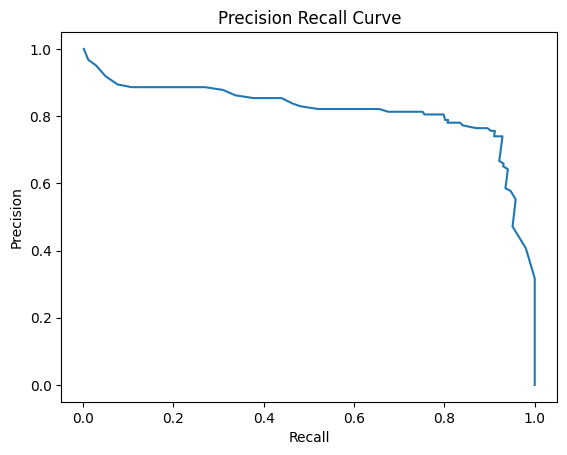

In [37]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [38]:
#4.3KNeighborsClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knnc = metrics.classification_report(y_test, y_pred)
print(knnc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.92      0.77      0.84       123

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [42]:
proba = knn.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Precision Recall Curve')

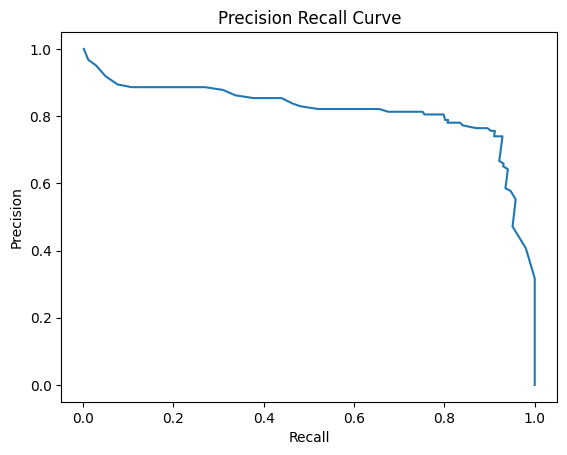

In [43]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [44]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
xgbc = metrics.classification_report(y_test, y_pred)
print(xgbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.92      0.76      0.84       123

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



Text(0.5, 1.0, 'Precision Recall Curve')

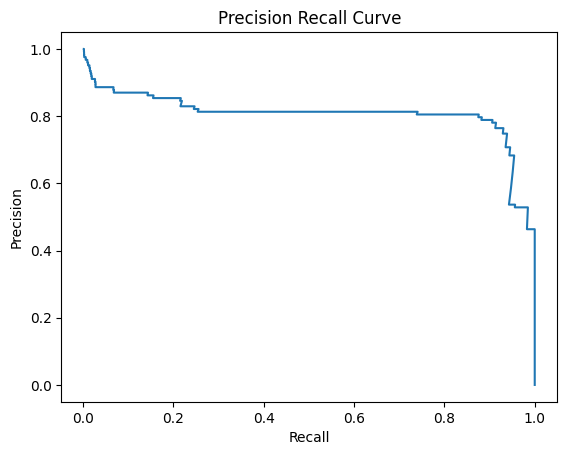

In [45]:
y_pred_prob = xgb_clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

# Feature importances

In [46]:
importances = rf_clf.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
# Print feature importances with column names as index
for i, row in importances_df.iterrows():
    print("%s: %.3f" % (row['Feature'], row['Importance']))

V14: 0.232
V10: 0.147
V17: 0.135
V11: 0.068
V12: 0.068
V4: 0.059
V7: 0.042
V3: 0.035
V16: 0.028
V9: 0.022
V2: 0.021
V21: 0.016
V8: 0.014
V5: 0.010
V19: 0.010
V1: 0.010
scaled_amount: 0.009
V18: 0.009
V13: 0.007
V20: 0.007
V26: 0.006
V15: 0.006
scaled_time: 0.006
V6: 0.006
V27: 0.005
V23: 0.005
V28: 0.004
V22: 0.004
V24: 0.004
V25: 0.003


# Hyperparamter tuning using GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
#Logistic Regression
lg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 250, 500],
    'multi_class': ['ovr', 'multinomial']}

grid_lg = GridSearchCV(lg, lg_param_grid, cv = 5, verbose=1, n_jobs = -1)
best_fit_lg = grid_lg.fit(X_over, y_over)
y_pred = best_fit_lg.best_estimator_.predict(X_test)
grid_lg = metrics.classification_report(y_test, y_pred)
print(grid_lg)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.12      0.87      0.21       123

    accuracy                           0.99     71202
   macro avg       0.56      0.93      0.60     71202
weighted avg       1.00      0.99      0.99     71202



In [49]:
# Random Forest Classifier
rf_param_grid = {"criterion": ["gini", "entropy"], 
                 "max_depth": list(range(2,4,1)), 
                 "min_samples_leaf": list(range(5,7,1))}

grid_rf = GridSearchCV(rf_clf, rf_param_grid, cv = 5, verbose=1, n_jobs = -1)
best_fit_rf = grid_rf.fit(X_over, y_over)
y_pred = best_fit_rf.best_estimator_.predict(X_test)
grid_rf = metrics.classification_report(y_test, y_pred)
print(grid_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.61      0.81      0.70       123

    accuracy                           1.00     71202
   macro avg       0.81      0.91      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
# XGBoost Classifier
xgb_param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [5, 10],
    'learning_rate': [0.1, 1.0],
    'subsample': [0.5, 0.75, 1.0]}

grid_xgb = GridSearchCV(xgb_clf, xgb_param_grid, cv = 2, verbose=1, n_jobs = -1)
best_fit_xgb = grid_xgb.fit(X_over, y_over)
y_pred = best_fit_xgb.best_estimator_.predict(X_test)
grid_xgb = metrics.classification_report(y_test, y_pred)
print(grid_xgb)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


In [ ]:
#KNN classification
knn_param_grid = {'n_neighbors': [3, 5],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

grid_knn = GridSearchCV(knn, knn_param_grid, cv = 5, verbose=1, n_jobs = -1)
best_fit_knn = grid_knn.fit(X_over, y_over)
y_pred = best_fit_knn.best_estimator_.predict(X_test)
grid_knn = metrics.classification_report(y_test, y_pred)
print(grid_knn)


# Ensemble Model Building

In [ ]:
vot_soft = VotingClassifier(estimators = [("Random Forest Classifier", best_fit_rf.best_estimator_), 
                                          ("XGBoost Classifier", best_fit_xgb.best_estimator_)], 
                            voting ='soft')

vot_soft.fit(X_over, y_over)
y_pred = vot_soft.predict(X_test)
  
score = metrics.classification_report(y_test, y_pred)
print(score)

In [ ]:
#7)Conclusion


As a result of this project , i learned that highly unbalanced data needs an different approach and that each classification problem needs different types of metrics.